## Stock Price Prediction
Predicting the stock market has been the bane and goal of investors since its inception. Every day billions of dollars are traded on the stock exchange, and behind every dollar is an investor hoping to make a profit in one way or another.

Entire companies rise and fall daily depending on market behaviour. If an investor is able to accurately predict market movements, he offers a tantalizing promise of wealth and influence. 

Today, so many people are making money staying at home trading in the stock market. It is a plus point for you if you use your experience in the stock market and your machine learning skills for the task of stock price prediction.

Let’s see how to predict stock prices using Machine Learning and the python programming language. I will start this task by importing all the necessary python libraries that we need for this task:

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data Preparation
In the above section, I started the task of stock price prediction by importing the python libraries. Now I will write a function that will prepare the dataset so that we can fit it easily in the Linear Regression model:

In [3]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [4]:
df = pd.read_csv("prices.csv")


In [5]:
#check the null values  
df.isnull().sum()

#removing the null values
df=df.dropna()

#check the null values
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [6]:
#check the columns of the data
df.columns
    

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [7]:
#check the head of the data
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3849,01-06-2011,RELIANCE,EQ,951.85,952.00,958.65,943.65,947.5,946.80,947.83,1838452,1.740000e+14,58630.0,901415.0,0.4903
3850,02-06-2011,RELIANCE,EQ,946.80,936.55,954.70,936.55,952.5,951.05,947.09,2152963,2.040000e+14,63061.0,1066759.0,0.4955
3851,03-06-2011,RELIANCE,EQ,951.05,960.50,967.00,931.50,936.0,934.60,951.69,4368279,4.160000e+14,128784.0,1035791.0,0.2371
3852,06-06-2011,RELIANCE,EQ,934.60,934.65,940.80,928.15,938.6,937.75,935.29,1405741,1.310000e+14,43384.0,476631.0,0.3391
3853,07-06-2011,RELIANCE,EQ,937.75,933.55,960.00,933.55,959.6,958.25,950.55,4025919,3.830000e+14,88703.0,2424958.0,0.6023


In [8]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [9]:
#drop the symbol column , date and series
df.drop(['Symbol','Date','Series'],1,inplace=True)  


/tmp/ipykernel_10132/252788912.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Symbol','Date','Series'],1,inplace=True)


In [10]:
#check the head of the datasets
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3849,951.85,952.00,958.65,943.65,947.5,946.80,947.83,1838452,1.740000e+14,58630.0,901415.0,0.4903
3850,946.80,936.55,954.70,936.55,952.5,951.05,947.09,2152963,2.040000e+14,63061.0,1066759.0,0.4955
3851,951.05,960.50,967.00,931.50,936.0,934.60,951.69,4368279,4.160000e+14,128784.0,1035791.0,0.2371
3852,934.60,934.65,940.80,928.15,938.6,937.75,935.29,1405741,1.310000e+14,43384.0,476631.0,0.3391
3853,937.75,933.55,960.00,933.55,959.6,958.25,950.55,4025919,3.830000e+14,88703.0,2424958.0,0.6023


In [11]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 3849 to 6204
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Prev Close          2356 non-null   float64
 1   Open                2356 non-null   float64
 2   High                2356 non-null   float64
 3   Low                 2356 non-null   float64
 4   Last                2356 non-null   float64
 5   Close               2356 non-null   float64
 6   VWAP                2356 non-null   float64
 7   Volume              2356 non-null   int64  
 8   Turnover            2356 non-null   float64
 9   Trades              2356 non-null   float64
 10  Deliverable Volume  2356 non-null   float64
 11  %Deliverble         2356 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 239.3 KB


## Data Visualization

<Axes: >

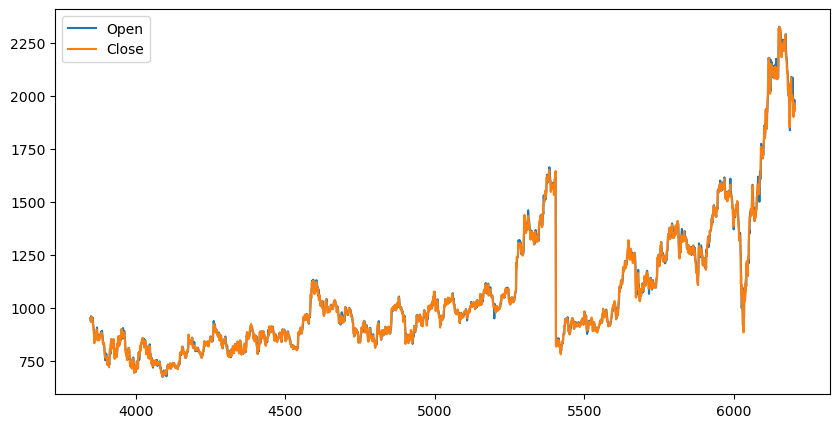

In [12]:
#plot a bar grapgh of open vs close
df[['Open','Close']].plot(figsize=(10, 5))


<Axes: >

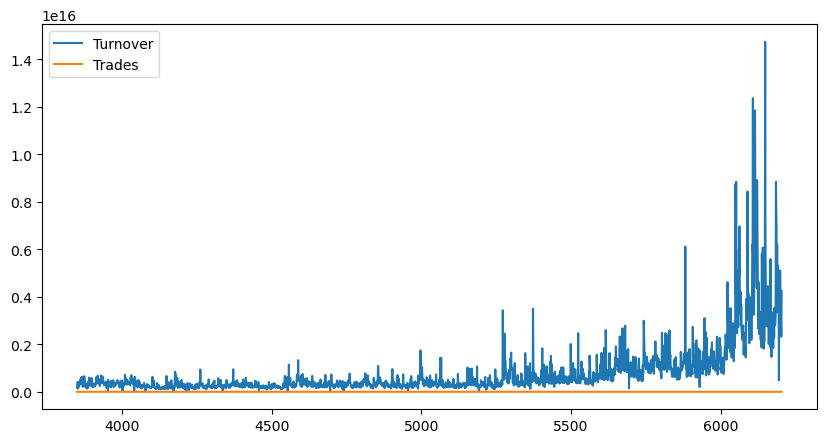

In [13]:
#plot a bar grapgh of turnover vs traders
df[['Turnover','Trades']].plot(figsize=(10, 5))
    

<Axes: >

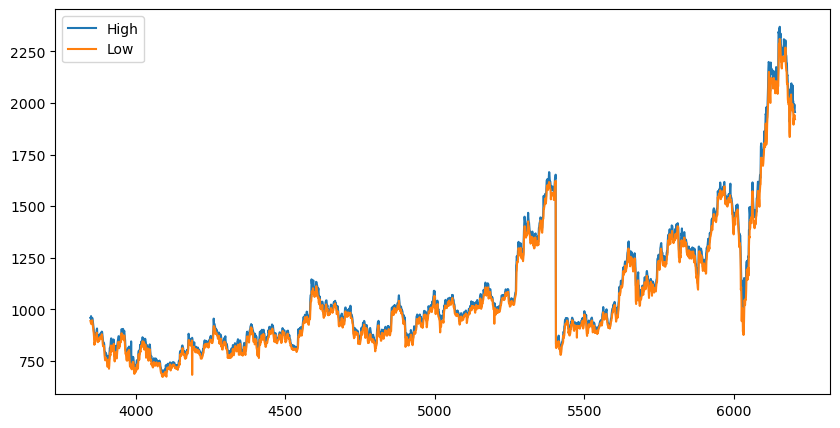

In [14]:
#plot a bar grapgh of high vs low
df[['High','Low']].plot(figsize=(10, 5))    


## ML modelling

In [19]:
#split the data into train and test
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,'Close',5,0.2)
    

In [20]:
#use linear regression
learner = LinearRegression()


In [21]:
#fit the model
learner.fit(X_train,Y_train)

LinearRegression()

In [23]:
#check the score and print it
score=learner.score(X_test,Y_test)
print(score)

0.9770214037170754


In [24]:
#use random forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)

In [25]:
#fit the model
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [26]:
#check the score and print it
score=regressor.score(X_test,Y_test)
print(score)

0.9678948384371219


In [27]:
#use DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)

In [28]:
#fit the model
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [30]:
#check the score and print it
score=regressor.score(X_test,Y_test)
print(score)

0.9576732727694153


In [31]:
#use the knn
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=2)  

In [32]:
#fit the model  
regressor.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=2)

In [33]:
#print the Accuracy of the model    
print(regressor.score(X_test,Y_test))

0.9679680496738572


In [34]:
#save the model
import pickle
filename = 'finalized_model.sav'
pickle.dump(regressor, open(filename, 'wb'))
